# Exercise - Polynomial(Non linear) Regression with semiconductor device I/V plot

The dataset is a plot of current variation of a device based on the voltage applied. The output is non linear in nature. We have to predict current based on voltage with non linear regression. 

### Perform the following operations:

1. Plot the voltage vs current. What degree of polynomial do you think is this?
2. Split the data into training & testing. It should be a 70:30 split with random_state 2. Obtain polynomial features for training and testing dataset with degree 2. 
3. Perform linear regression on the transformed training dataset. Plot the polynomial curve obtained along with training data set. Does it properly fit or overfit?
4. Predict the output for test dataset, and plot a scatter of test output vs obtained output. Obtain MSE and R^2 score. 

### Vary the degree from 2 to 10. For which values of degree does the data start to overfit? Plot the training dataset and obtained curve for each degree and justify.


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
df = pd.read_csv('./data/data.csv')
a=df["voltage"]
b=df["current"]
a=np.array(a).reshape(-1,1)

## Plot the voltage vs current. What degree of polynomial do you think is this?
#### --> this is polynomial with degree three.

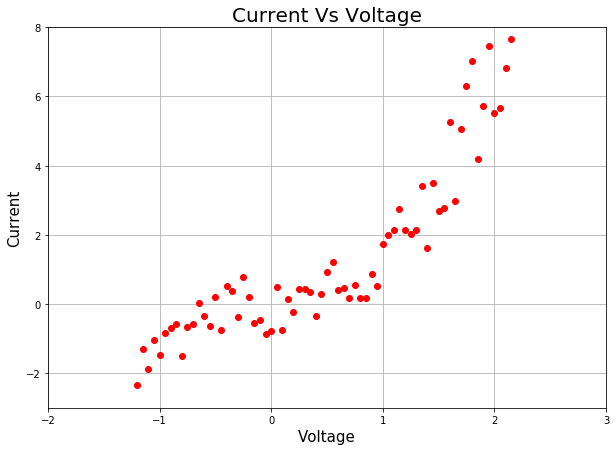

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(a,b,'ro')
plt.xlabel("Voltage",fontsize=15);plt.ylabel("Current",fontsize=15);plt.title("Current Vs Voltage",fontsize=20)
plt.axis([-2,3,-3,8])
plt.grid(True)

### Split the data into training & testing. It should be a 70:30 split with random_state 2.

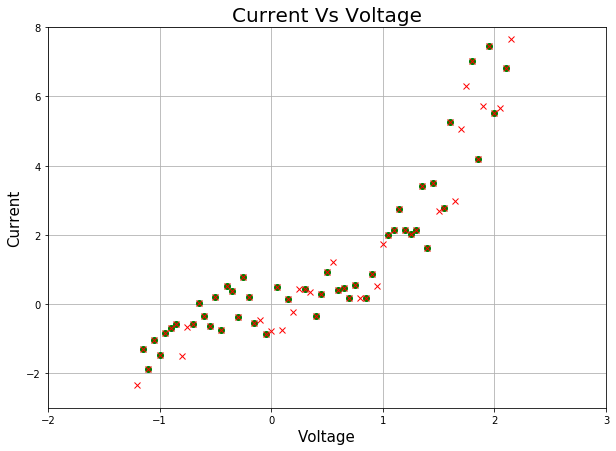

In [3]:
PS_train,PS_test,PP_train,PP_test=train_test_split(a,b,test_size=0.3,random_state=2)
plt.figure(figsize=(10,7))
plt.xlabel("Voltage",fontsize=15);plt.ylabel("Current",fontsize=15);plt.title("Current Vs Voltage",fontsize=20)
plt.plot(PS_train,PP_train,'go')
plt.plot(a,b,'rx')
plt.axis([-2,3,-3,8])
plt.grid()

## Perform linear regression on the transformed training dataset. Plot the polynomial curve obtained along with training data set. Does it properly fit or overfit?
#### --> It properly fits on the data set.

In [4]:
from sklearn.linear_model import LinearRegression
poly=PolynomialFeatures(degree=3)
QuadraticCoeff=poly.fit_transform(PS_train)
#QuadraticCoeff

In [12]:
Pmodel=LinearRegression()
Pmodel.fit(QuadraticCoeff,PP_train)
#print("Expected Output",PP_train)
#print("Predicted Output\n",Pmodel.predict(QuadraticCoeff))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

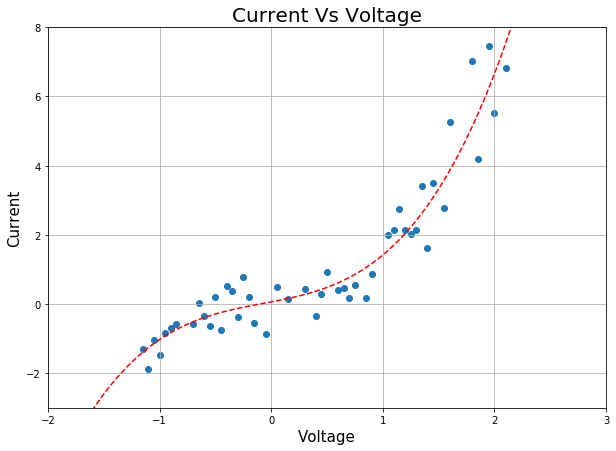

In [6]:
plt.figure(figsize=(10,7))
XX=np.linspace(-2,3,100).reshape(-1,1) #column array
XX_quadratic=poly.fit_transform(XX)
plt.axis([-2,3,-3,8])
plt.grid()
plt.xlabel("Voltage",fontsize=15);plt.ylabel("Current",fontsize=15);plt.title("Current Vs Voltage",fontsize=20)
plt.plot(XX,Pmodel.predict(XX_quadratic),c='r',linestyle='--')
plt.scatter(PS_train,PP_train)
plt.show()

## Predict the output for test dataset, and plot a scatter of test output vs obtained output. Obtain MSE score. 

In [7]:
print("Training set accuracy:",Pmodel.score(QuadraticCoeff,PP_train))
#print(Pmodel.score(a,b))
#print(Pmodel.score(a,b))

Training set accuracy: 0.912588930839


In [8]:
QuadraticCoeff_test=poly.fit_transform(PS_test)
#print("Expected Output",PP_test)
#print("Predicted Output\n",Pmodel.predict(QuadraticCoeff_test))
print("Test set accuracy:",Pmodel.score(QuadraticCoeff_test,PP_test))

Test set accuracy: 0.925716410898


In [13]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(PP_train,Pmodel.predict(QuadraticCoeff))
print('SGD MSE',mse)
from sklearn.metrics import r2_score
rr=r2_score(PP_train, Pmodel.predict(QuadraticCoeff))
print('rr error',rr)

SGD MSE 0.388704498922
rr error 0.92322298833


### Vary the degree from 2 to 10. For which values of degree does the data start to overfit? Plot the training dataset and obtained curve for each degree and justify.
#### --> Model fits perfectly on model with degree 3,above that model starts to overfit on the data.

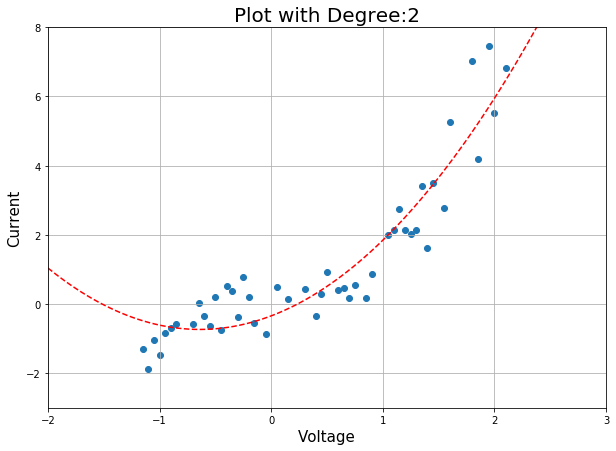

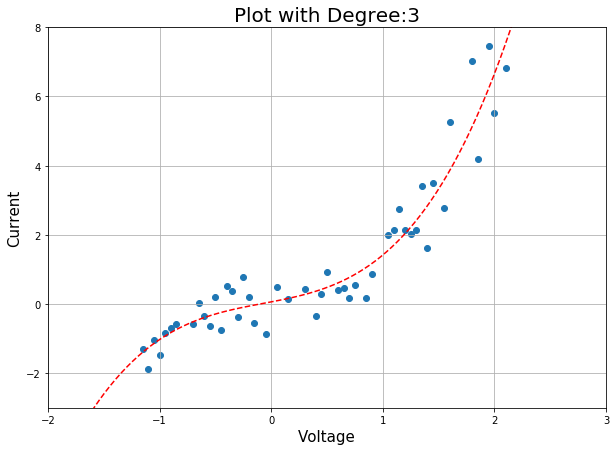

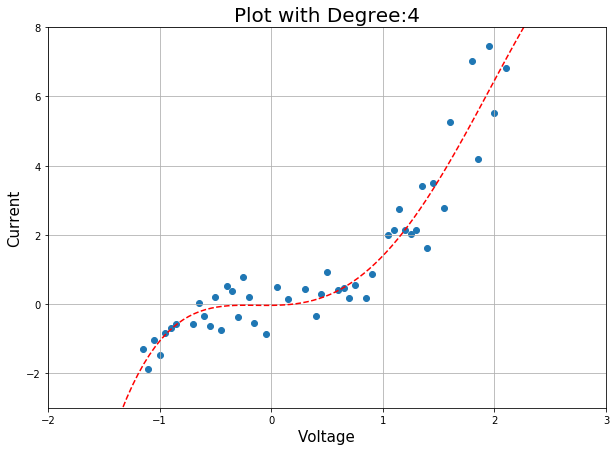

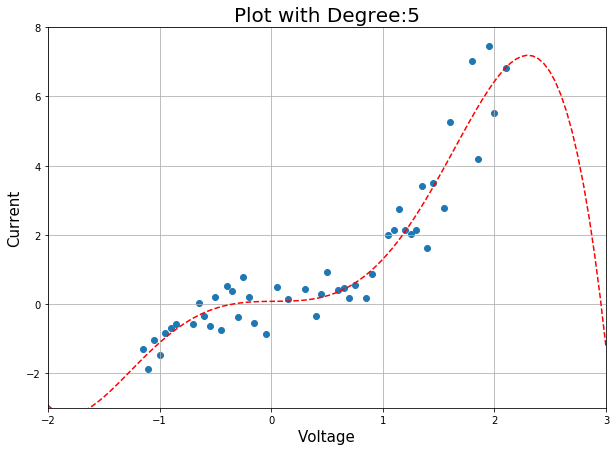

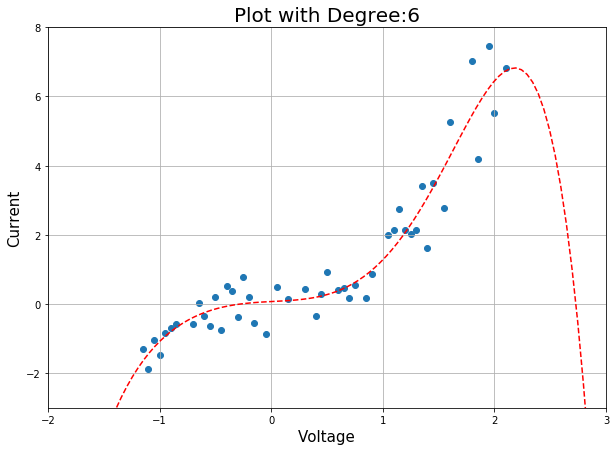

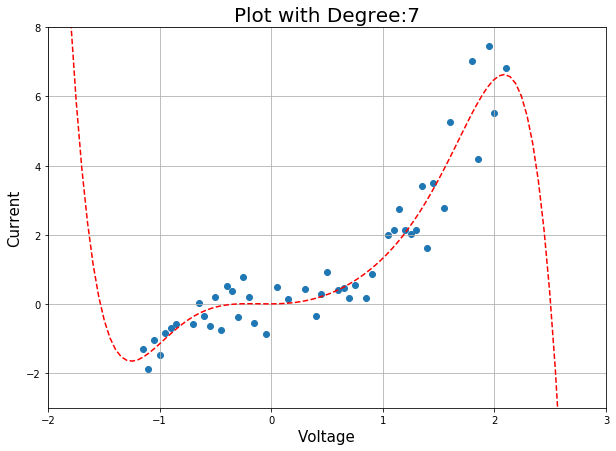

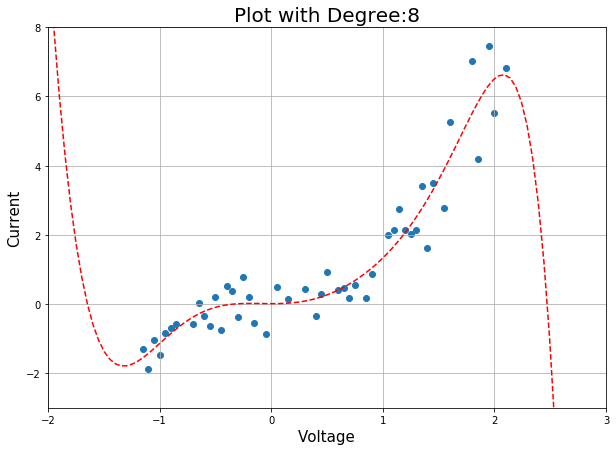

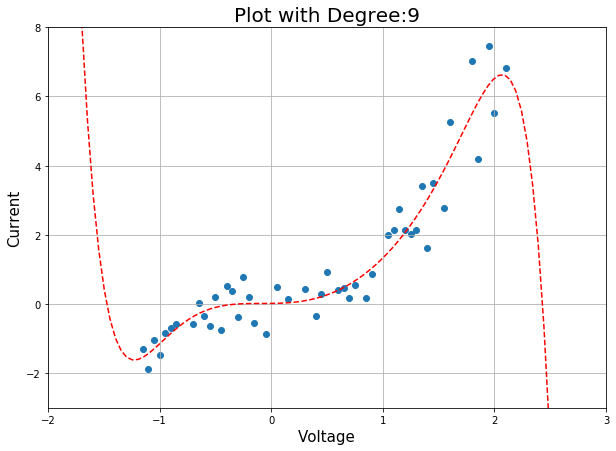

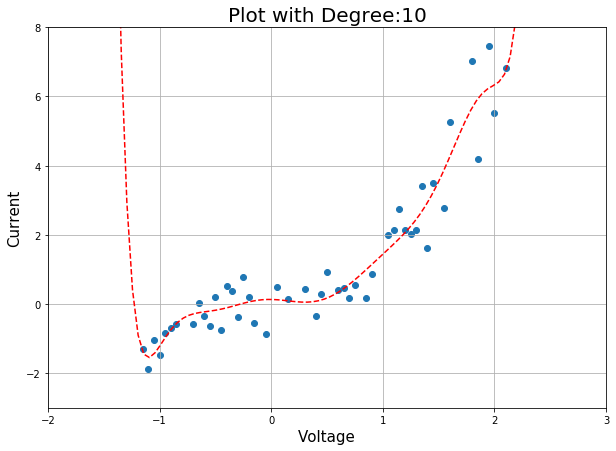

In [10]:
for i in range(2,11):
    from sklearn.linear_model import LinearRegression
    plt.figure(figsize=(10,7))
    poly=PolynomialFeatures(degree=i)
    QuadraticCoeff=poly.fit_transform(PS_train)
    Pmodel=LinearRegression()
    Pmodel.fit(QuadraticCoeff,PP_train)
    XX=np.linspace(-2,3,100).reshape(-1,1) #column array
    XX_quadratic=poly.fit_transform(XX)
    plt.axis([-2,3,-3,8])
    plt.xlabel("Voltage",fontsize=15);plt.ylabel("Current",fontsize=15);plt.title("Plot with Degree:"+str(i),fontsize=20)
    plt.grid()
    plt.plot(XX,Pmodel.predict(XX_quadratic),c='r',linestyle='--')
    plt.scatter(PS_train,PP_train)
    plt.show()